# 6. Hypothesentest


### 6.4	Kalibrierung von Drucksensoren


a) Das Ergebnis des Referenzprüfstands kann über die standardnormalverteilte Zufallsvariable p$_R$


${p_R} = \frac{{{{\bar p}_R} - {\mu _R}}}{{\frac{{{\sigma _R}}}{{\sqrt 5 }}}} = \sqrt 5  \cdot \frac{{{{\bar p}_R} - {\mu _R}}}{{{\sigma _R}}}$


beschrieben werden. Ebenso gilt für die Prüfvorrichtung

${p_P} = \frac{{{{\bar p}_P} - {\mu _P}}}{{\frac{{{\sigma _P}}}{{\sqrt 5 }}}} = \sqrt 5  \cdot \frac{{{{\bar p}_P} - {\mu _P}}}{{{\sigma _P}}}$



Die Abweichung der beiden Prüfstände wird durch die Differenz p$_R$ - p$_P$ beschrieben. Da beide Zufallsvariablen normalverteilt sind, ist auch die Differenz normalverteilt mit den Mittelwert 

$\Delta \mu  = {\mu _P} - {\mu _R}$



und der Standardabweichung


$\sigma  = \frac{1}{{\sqrt 5 }} \cdot \sqrt {\sigma _P^2 + \sigma _R^2} $



Damit ist die Größe 



$z = \sqrt 5  \cdot \frac{{{{\bar p}_P} - {{\bar p}_R} - {\mu _P} + {\mu _R}}}{{\sqrt {\sigma _P^2 + \sigma _R^2} }} = \sqrt 5  \cdot \frac{{\Delta \bar p - \Delta \mu }}{{\sqrt {\sigma _P^2 + \sigma _R^2} }}$


standardnormalverteilt. Für die Größe z wird folgender Hypothesentest aufgestellt:

H0: Die Prüfstände weichen nicht voneinander ab, $\Delta \mu$ = 0

H1: Die Prüfstände weichen voneinander ab, $\Delta \mu$ $\ne $ 0 





b) Die Eingriffsgrenzen ergeben sich unter Annahme der Nullhypothese $\Delta \mu$ = 0 aus der Bedingung 

${c_1} = {F^{ - 1}}\left( {\frac{\alpha }{2}} \right) =  - 1.96$


und 


${c_2} = {F^{ - 1}}\left( {1 - \frac{\alpha }{2}} \right) = 1.96$


Umrechnen in den Druckbereich führt zu


$\Delta {p_1} = {c_1} \cdot \frac{{\sqrt {\sigma _P^2 + \sigma _R^2} }}{{\sqrt 5 }} =  - 0.472\,\,mbar$

und

$\Delta {p_2} = {c_2} \cdot \frac{{\sqrt {\sigma _P^2 + \sigma _R^2} }}{{\sqrt 5 }} = 0.472\,\,mbar$



c) Die Gütefunktion gibt die Wahrscheinlichkeit für eine richtige Verwerfung der Nullhypothese als Funktion der wirklichen Abweichung $\Delta\mu$ an. Sie ergibt sich aus der Gleichung



$1 - \beta \left( {\Delta \mu } \right) = \int\limits_{ - \infty }^{\Delta {p_1}} {f\left( {\Delta p} \right)\,\Delta p}  + 1 - \int\limits_{ - \infty }^{\Delta {p_2}} {f\left( {\Delta p} \right)\,\Delta p}$



Dabei ist f($\Delta$p) eine Normalverteilung mit dem oben berechneten Mittelwert $\Delta\mu$ und der oben berechneten Standardabweichung $\sigma$. 




d) Die Gütefunktion kann mit folgendem Python-Programm dargestellt werden:

Es ergibt sich die blaue Kurve in dem folgenden Diagramm:



In [5]:
""" Bibliotheken importieren"""
from scipy.stats import norm   # normal-Verteilung
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


''' Definition der Eingriffsgrenzen'''
n = 5
sigR = 0.2
sigP = 0.5
sig = np.sqrt(sigP**2+sigR**2)/np.sqrt(n)
alpha = 0.05
c1 = norm.ppf(alpha/2,0,1)
c2 = norm.ppf(1-alpha/2,0,1)
p1 = c1 *sig
p2 = c2 *sig

'''Berechnung der Gütefunktion'''
dmu = np.arange(-2,2+0.01, 0.01)
G = norm.cdf(p1,dmu,sig) + 1 - norm.cdf(p2,dmu,sig)
c1, c2, p1, p2


(-1.9599639845400545,
 1.959963984540054,
 -0.4720218338173134,
 0.4720218338173133)

e) Die Grenze ergibt sich aus dem ersten Wert der Gütefunktion, der eine Wahrscheinlichkeit 
p $ \le $ 0.95 aufweist. Es ergibt sich ein Wert $\Delta$p = 0.8600 mbar.


In [2]:
''' Berechnung des ersten Wertes, der eine Wahrscheinlichkeit <= 0.95 besitzt'''
bin = np.where(G<=0.95)
dp = np.abs(dmu[bin[0][0]])
dp

0.859999999999999

f) Bei der Erhöhung des Stichprobenumfangs ändert sich im Wesentlichen die Standardabweichung. Durch eine Iteration kann der erforderliche Stichprobenumfang bestimmt werden. Es werden N = 15 Teile benötigt, um die erforderliche Aussagesicherheit zu bekommen. Die Gütefunktion ist in der Abbildung bereits rot eingezeichnet.


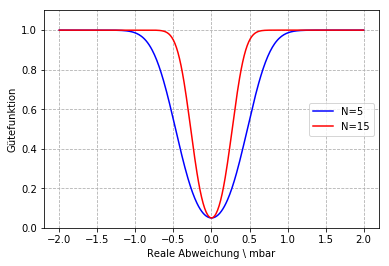

In [3]:
'''Grafikdarstellung der Gütefunktion'''
plt.plot(dmu,G, color='b') #für N=5
plt.grid(True, which= 'both', axis='both', linestyle='--')
plt.xlabel('Reale Abweichung \ mbar')
plt.ylabel('Gütefunktion')
plt.ylim(top=1.1, bottom=0)
plt.legend(['N=5'])


''' Erhöhung des Stichprobenumfangs, bis eine Wahrscheinlichkeit = 0.95 bei dp = 0.5 vorliegt'''
n = 0
while dp > 0.5:
    
    n = n + 1
    sig = np.sqrt(sigP**2+sigR**2)/np.sqrt(n)
    c1 = norm.ppf(alpha/2,0,1)
    c2 = norm.ppf(1-alpha/2,0,1)
    p1 = c1 *sig
    p2 = c2 *sig
    G = norm.cdf(p1,dmu,sig) + 1 - norm.cdf(p2,dmu,sig)   
    bin = np.where(G<=0.95)
    dp = np.abs(dmu[bin[0][0]])
    
plt.plot(dmu,G, color='r') #für N=15
plt.legend(['N=5','N=15'], loc=5)


g) Die Eingriffsgrenzen ergeben sich in dem Fall zu p$_1$ = - 0.2725 mbar und p$_2$ = 0.2725 mbar.

In [4]:
p1,p2

(-0.2725219328178067, 0.2725219328178066)